In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
from scipy import stats
from scipy.stats import levene, mannwhitneyu

# Step 1: Load Datasets
from google.colab import files

In [ ]:
# Upload WBCD dataset
print("Upload the Wisconsin Breast Cancer Dataset (WBCD):")
wbcd_file = r"/content/wisconsin.csv"
wbcd_df = pd.read_csv(wbcd_file)

# Upload New FNAC Dataset
print("Upload the new FNAC-like dataset:")
fnac_file = r"/content/RIMS_FNAC.csv"
fnac_df = pd.read_csv(fnac_file)

Upload the Wisconsin Breast Cancer Dataset (WBCD):
Upload the new FNAC-like dataset:


In [ ]:
# Preview datasets
print("\nWBCD Dataset:")
print(wbcd_df.info())


WBCD Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [ ]:
print("\nFNAC Dataset:")
print(fnac_df.info())


FNAC Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial no.           462 non-null    object 
 1   area_mean            462 non-null    float64
 2   area_se              462 non-null    float64
 3   area_worst           462 non-null    float64
 4   perimeter_mean       462 non-null    float64
 5   perimeter_se         462 non-null    float64
 6   perimeter_worst      462 non-null    float64
 7   radius_mean          462 non-null    float64
 8   radius_se            462 non-null    float64
 9   radius_worst         462 non-null    float64
 10  smoothness_mean      462 non-null    float64
 11  smoothness_worst     462 non-null    float64
 12  snake_refined_count  462 non-null    int64  
 13  Diagnosis            462 non-null    object 
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 no

In [ ]:
# Ensure the same feature columns are present in both datasets
common_features = list(set(wbcd_df.columns).intersection(set(fnac_df.columns)))
print(f"\nCommon Features: {common_features}")

# Exclude 'Diagnosis' from common features
features_for_ks_test = [feature for feature in common_features if feature != "Diagnosis"]
print(f"\nFeatures used for KS Test: {features_for_ks_test}")


Common Features: ['perimeter_worst', 'perimeter_se', 'area_worst', 'area_se', 'smoothness_worst', 'perimeter_mean', 'Diagnosis', 'radius_mean', 'smoothness_mean', 'area_mean', 'radius_se', 'radius_worst']

Features used for KS Test: ['perimeter_worst', 'perimeter_se', 'area_worst', 'area_se', 'smoothness_worst', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'area_mean', 'radius_se', 'radius_worst']


<ipython-input-29-dc018e46a036>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
<ipython-input-29-dc018e46a036>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fnac_m_subset[feature], label="FNAC (M)", shade=True, ax=axes[i])
<ipython-input-29-dc018e46a036>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
<ipython-input-29-dc018e46a036>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

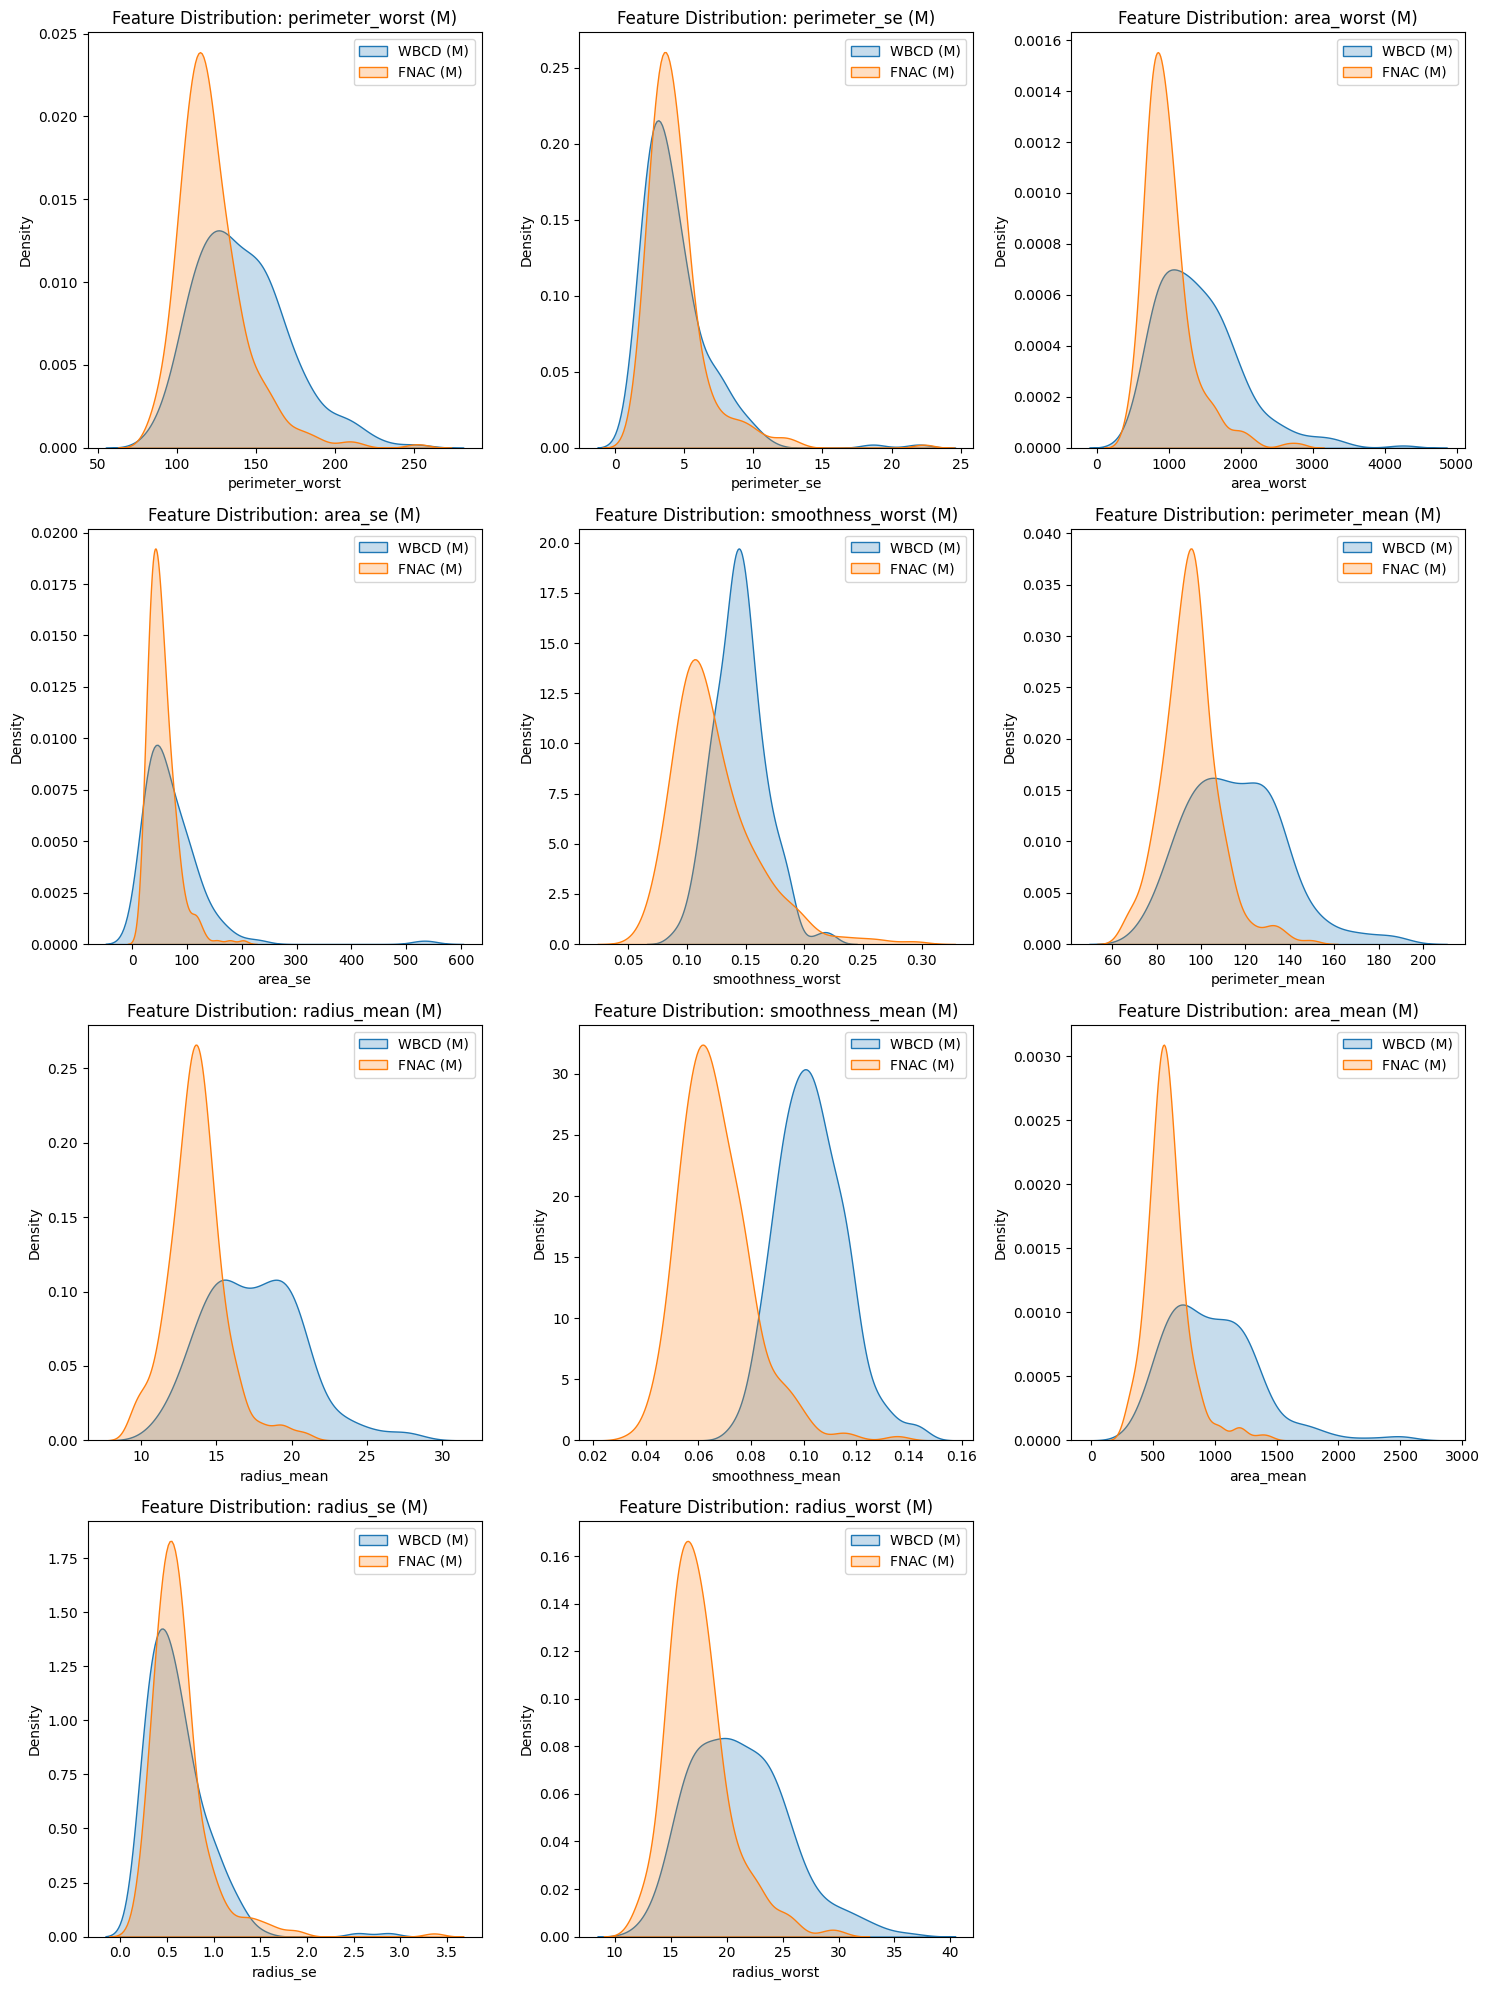

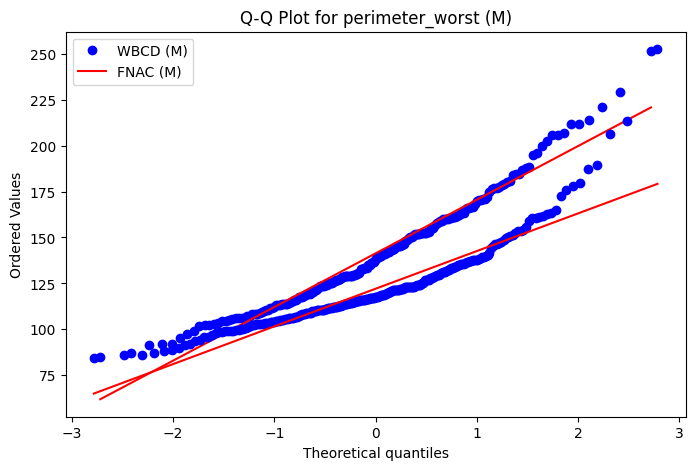

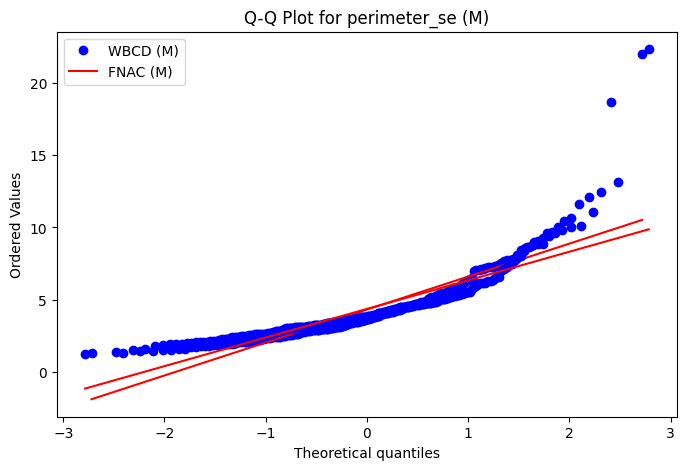

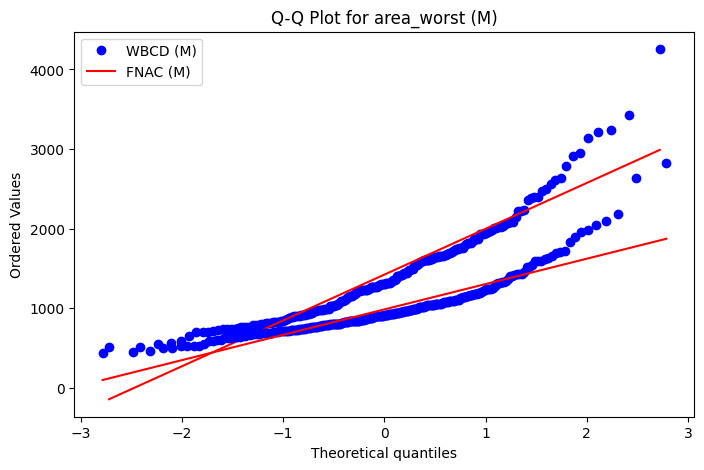

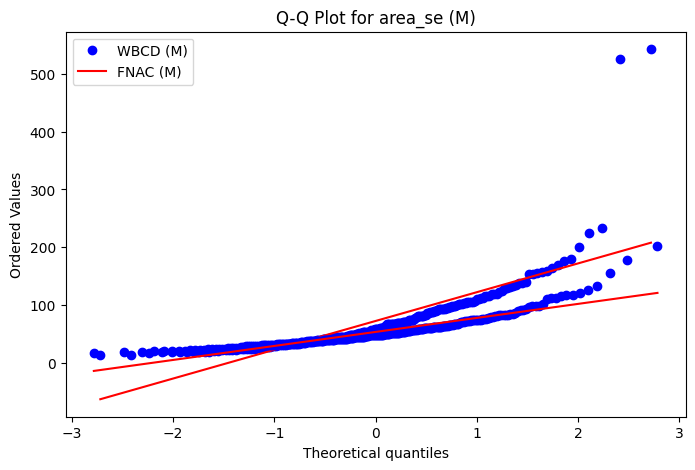

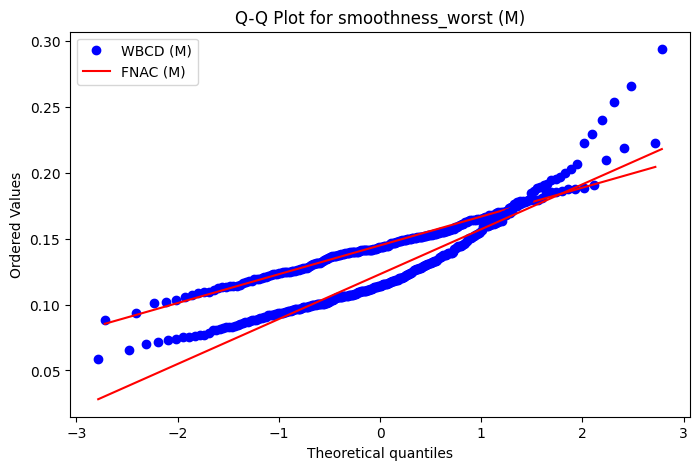

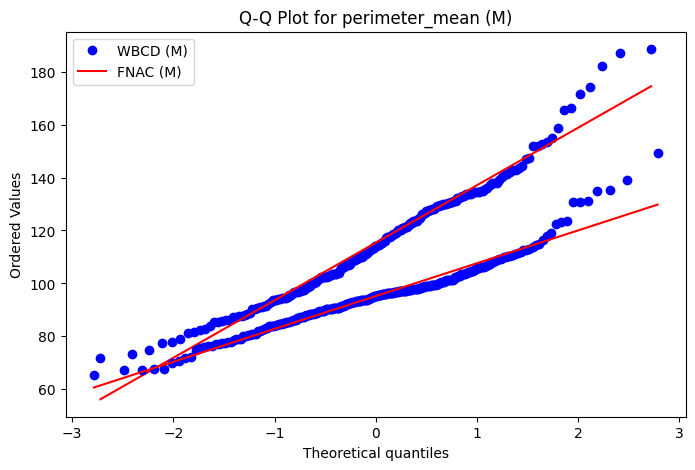

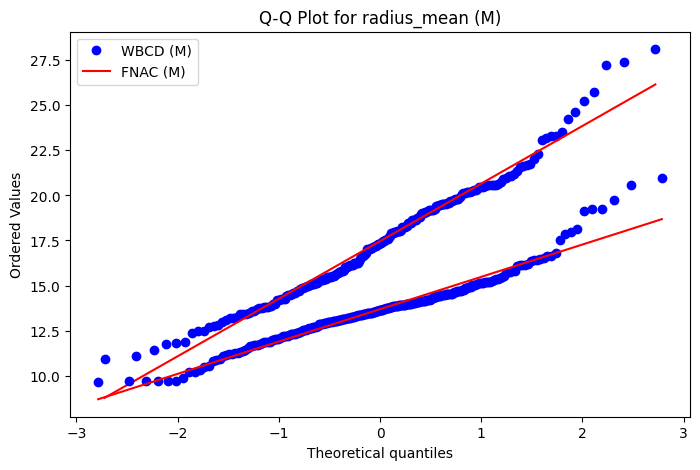

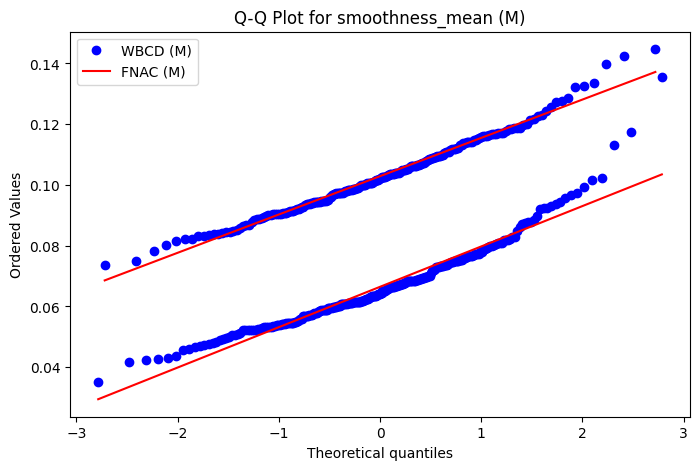

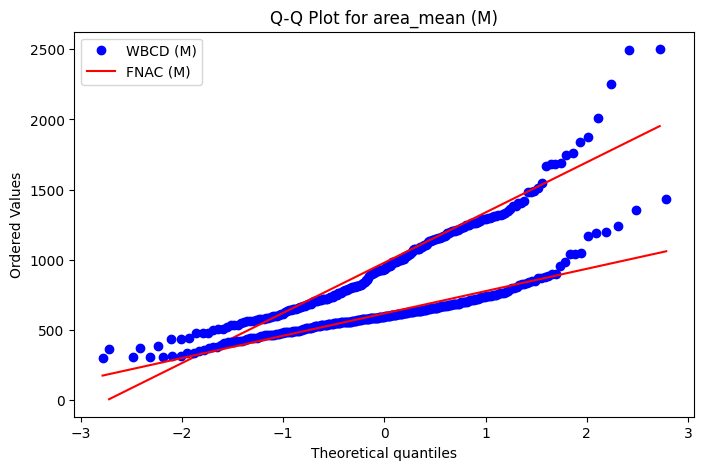

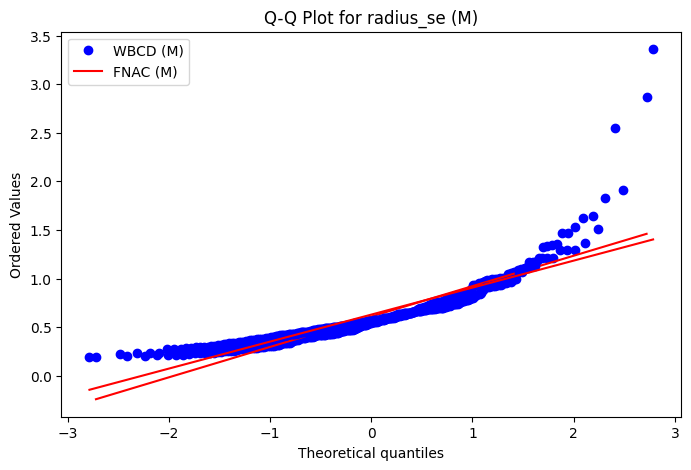

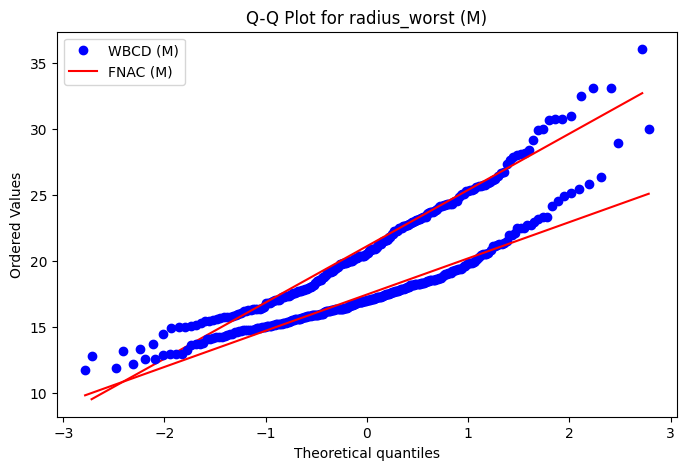


Kolmogorov-Smirnov Test Results:
perimeter_worst: KS statistic = 0.36342694164107064, p-value = 3.3978976789803997e-14
perimeter_se: KS statistic = 0.14783530788357466, p-value = 0.010766296332227117
area_worst: KS statistic = 0.4418238993710692, p-value = 5.4224563434983206e-21
area_se: KS statistic = 0.2404929062454293, p-value = 2.071213858065676e-06
smoothness_worst: KS statistic = 0.47038174637999125, p-value = 7.815173513545156e-24
perimeter_mean: KS statistic = 0.49992686850958024, p-value = 5.281201871249916e-27
radius_mean: KS statistic = 0.5946321486031886, p-value = 8.16492734348066e-39
smoothness_mean: KS statistic = 0.8778338452537663, p-value = 2.814792017132703e-94
area_mean: KS statistic = 0.5540076056750036, p-value = 2.026679658259e-33
radius_se: KS statistic = 0.13620740090683048, p-value = 0.023551933680041878
radius_worst: KS statistic = 0.45209887377504754, p-value = 5.402385311522026e-22

Levene's Test Results:
perimeter_worst: Levene statistic = 27.310888667186

In [ ]:
# Filter rows with 'M' diagnosis in both datasets
wbcd_m_diagnosis = wbcd_df[wbcd_df['Diagnosis'] == 'M']
fnac_m_diagnosis = fnac_df[fnac_df['Diagnosis'] == 'M']

# Subset the data for common features
wbcd_m_subset = wbcd_m_diagnosis[features_for_ks_test]
fnac_m_subset = fnac_m_diagnosis[features_for_ks_test]

# Compare distributions: Plot KDE and Q-Q plots
num_features = len(features_for_ks_test)
cols = 3  # Number of columns in plot grid
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features_for_ks_test):
    # KDE plots
    sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
    sns.kdeplot(fnac_m_subset[feature], label="FNAC (M)", shade=True, ax=axes[i])
    axes[i].set_title(f"Feature Distribution: {feature} (M)")
    axes[i].legend()

for i in range(num_features, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Q-Q plots
for feature in features_for_ks_test:
    plt.figure(figsize=(8, 5))
    stats.probplot(wbcd_m_subset[feature], dist="norm", plot=plt)
    stats.probplot(fnac_m_subset[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature} (M)")
    plt.legend(["WBCD (M)", "FNAC (M)"])
    plt.show()

# Run statistical tests for feature distributions
print("\nKolmogorov-Smirnov Test Results:")
ks_results = {}
for feature in features_for_ks_test:
    statistic, p_value = ks_2samp(wbcd_m_subset[feature], fnac_m_subset[feature])
    ks_results[feature] = (statistic, p_value)
    print(f"{feature}: KS statistic = {statistic}, p-value = {p_value}")

# Levene's Test for variance
print("\nLevene's Test Results:")
for feature in features_for_ks_test:
    stat, p_value = levene(wbcd_m_subset[feature], fnac_m_subset[feature])
    print(f"{feature}: Levene statistic = {stat}, p-value = {p_value}")

# Mann-Whitney U Test for distribution similarity
print("\nMann-Whitney U Test Results:")
for feature in features_for_ks_test:
    stat, p_value = mannwhitneyu(wbcd_m_subset[feature], fnac_m_subset[feature])
    print(f"{feature}: U-statistic = {stat}, p-value = {p_value}")


<ipython-input-38-001514ac0670>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
<ipython-input-38-001514ac0670>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fnac_m_subset[feature], label="FNAC (M)", shade=True, ax=axes[i])
<ipython-input-38-001514ac0670>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
<ipython-input-38-001514ac0670>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

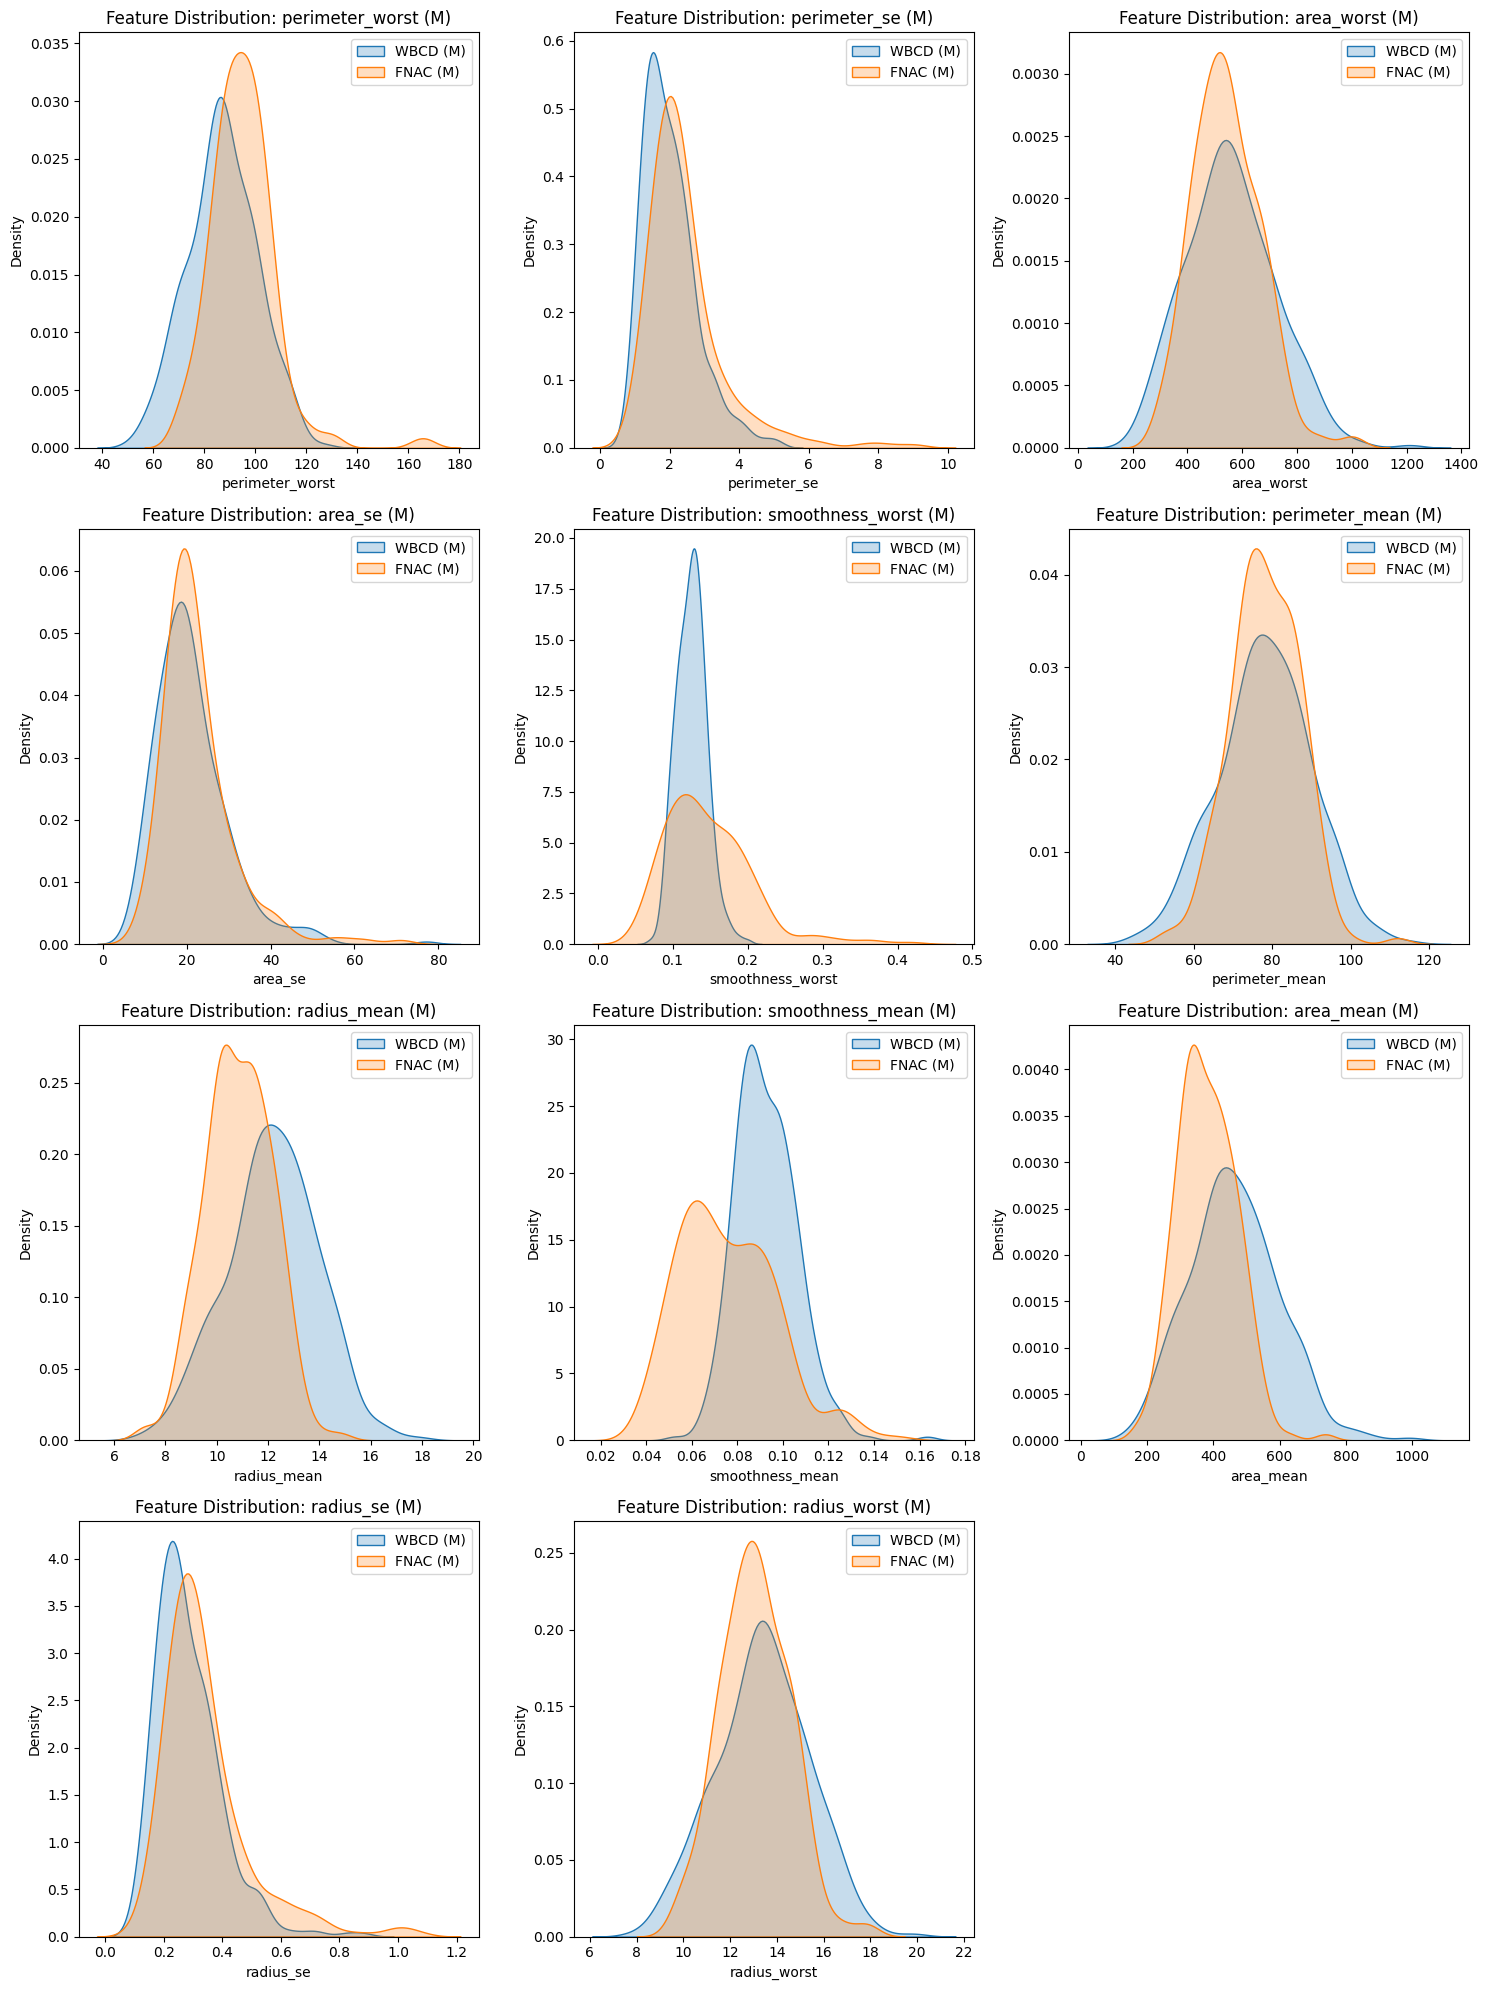

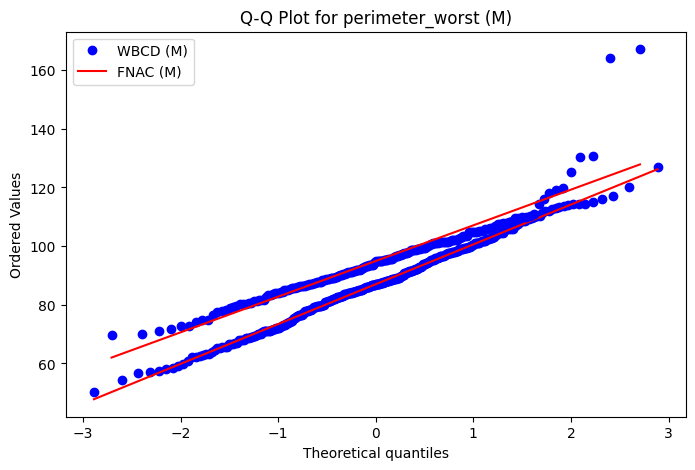

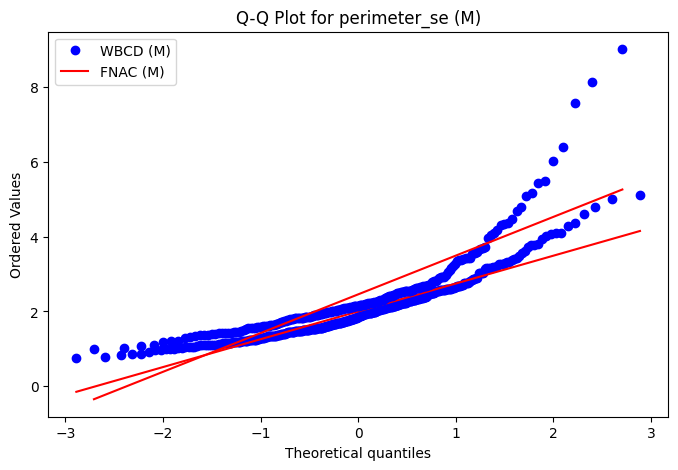

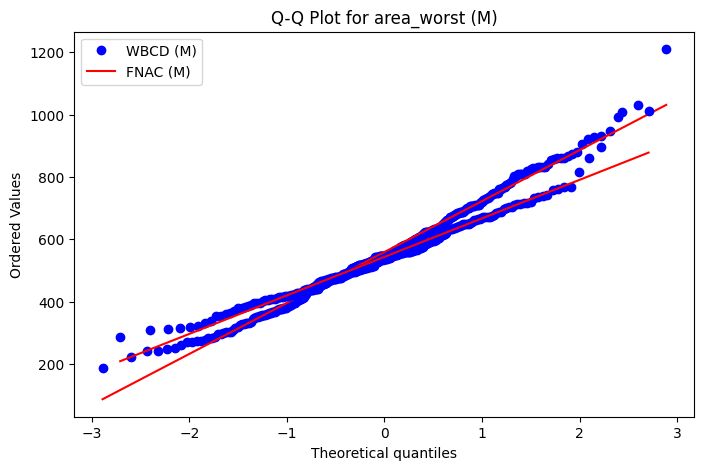

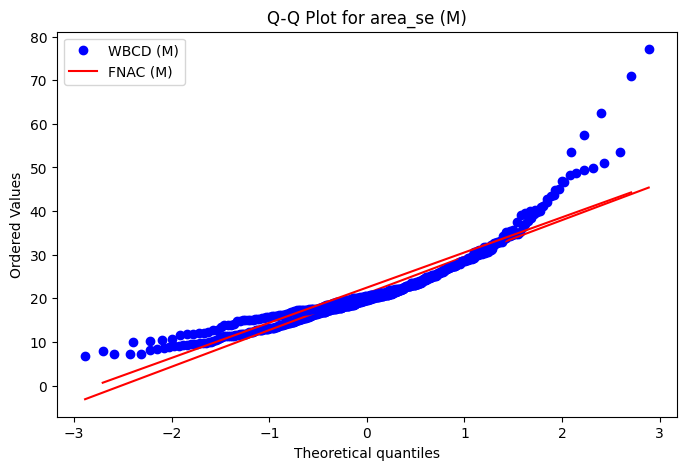

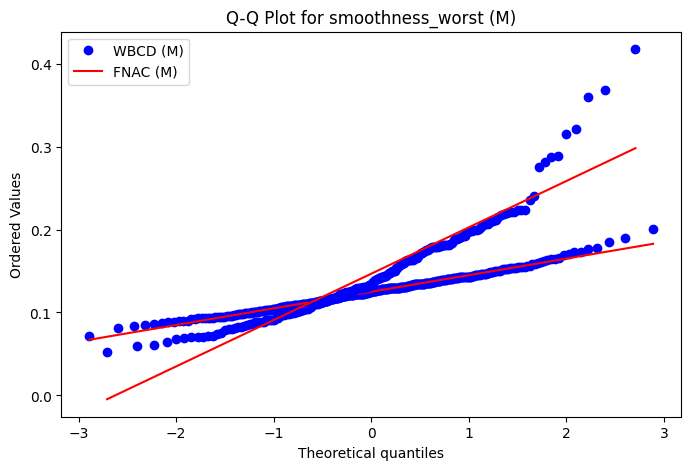

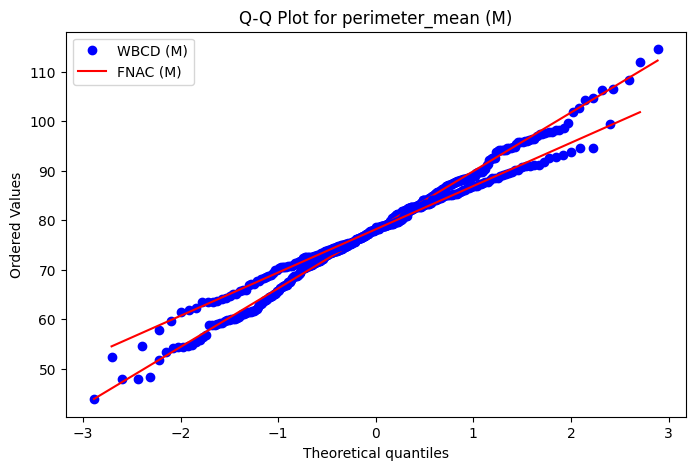

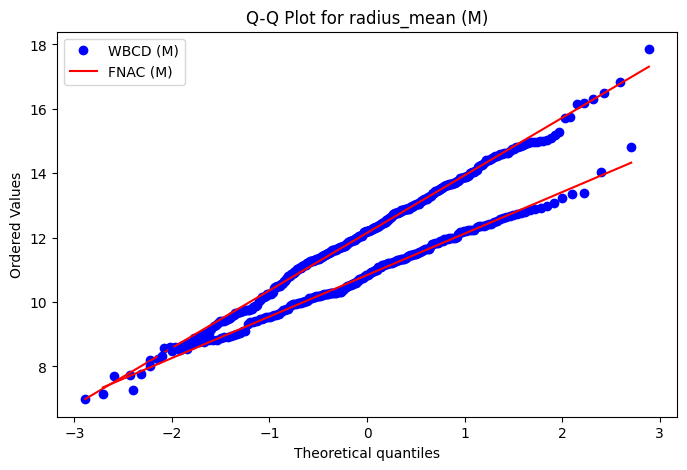

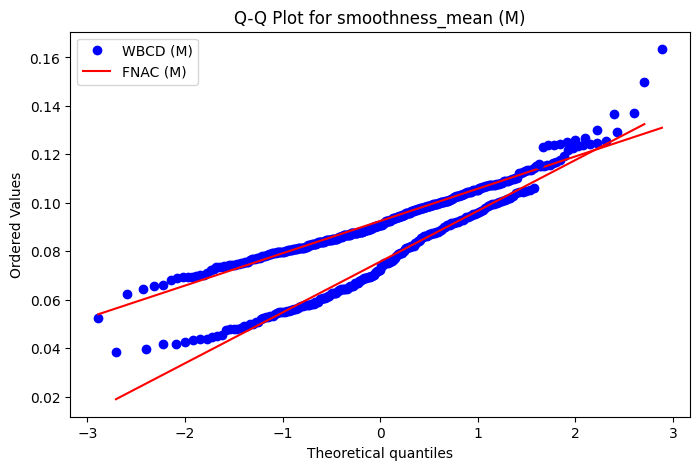

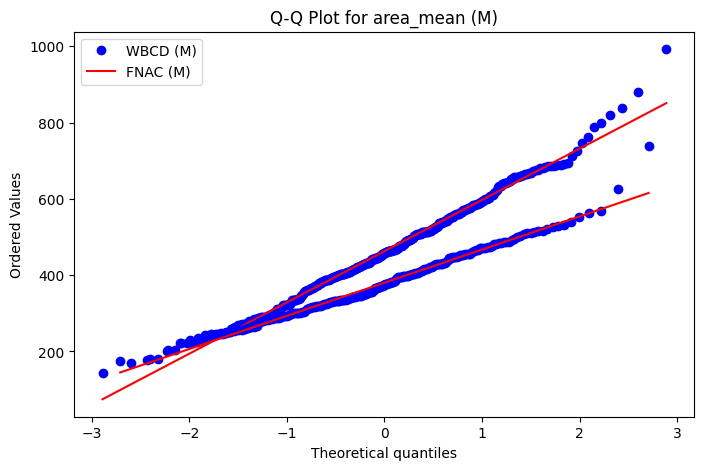

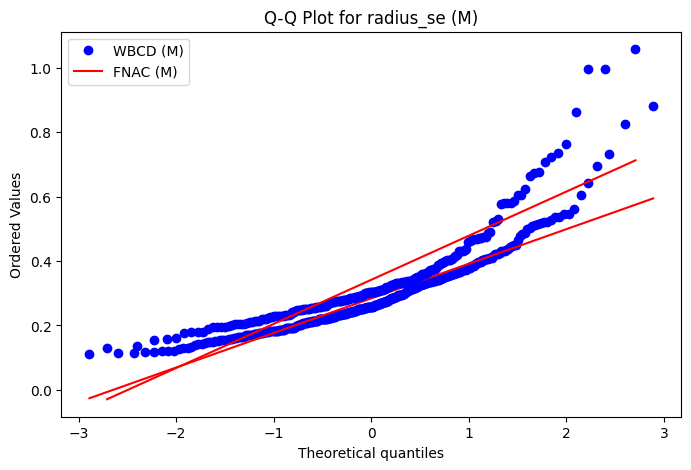

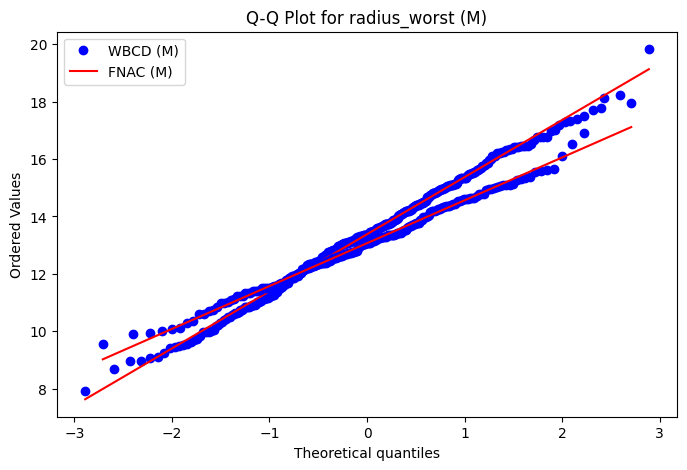


Kolmogorov-Smirnov Test Results:
perimeter_worst: KS statistic = 0.2710084033613445, p-value = 7.055409944573493e-09
perimeter_se: KS statistic = 0.23599439775910364, p-value = 7.995005819488926e-07
area_worst: KS statistic = 0.11134453781512606, p-value = 0.07417768936699012
area_se: KS statistic = 0.14145658263305322, p-value = 0.009999376420193794
smoothness_worst: KS statistic = 0.34173669467787116, p-value = 6.03978486493891e-14
perimeter_mean: KS statistic = 0.0896358543417367, p-value = 0.2337237890387553
radius_mean: KS statistic = 0.36134453781512604, p-value = 1.4206400642810362e-15
smoothness_mean: KS statistic = 0.46638655462184875, p-value = 4.7834007976735875e-26
area_mean: KS statistic = 0.31862745098039214, p-value = 3.751809224531079e-12
radius_se: KS statistic = 0.219187675070028, p-value = 6.089169254103421e-06
radius_worst: KS statistic = 0.13935574229691877, p-value = 0.011679802514787596

Levene's Test Results:
perimeter_worst: Levene statistic = 4.71505568756168

In [ ]:
# Filter rows with 'M' diagnosis in both datasets
wbcd_m_diagnosis = wbcd_df[wbcd_df['Diagnosis'] == 'B']
fnac_m_diagnosis = fnac_df[fnac_df['Diagnosis'] == 'B']

# Subset the data for common features
wbcd_m_subset = wbcd_m_diagnosis[features_for_ks_test]
fnac_m_subset = fnac_m_diagnosis[features_for_ks_test]

# Compare distributions: Plot KDE and Q-Q plots
num_features = len(features_for_ks_test)
cols = 3  # Number of columns in plot grid
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features_for_ks_test):
    # KDE plots
    sns.kdeplot(wbcd_m_subset[feature], label="WBCD (M)", shade=True, ax=axes[i])
    sns.kdeplot(fnac_m_subset[feature], label="FNAC (M)", shade=True, ax=axes[i])
    axes[i].set_title(f"Feature Distribution: {feature} (M)")
    axes[i].legend()

for i in range(num_features, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Q-Q plots
for feature in features_for_ks_test:
    plt.figure(figsize=(8, 5))
    stats.probplot(wbcd_m_subset[feature], dist="norm", plot=plt)
    stats.probplot(fnac_m_subset[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature} (M)")
    plt.legend(["WBCD (M)", "FNAC (M)"])
    plt.show()

# Run statistical tests for feature distributions
print("\nKolmogorov-Smirnov Test Results:")
ks_results = {}
for feature in features_for_ks_test:
    statistic, p_value = ks_2samp(wbcd_m_subset[feature], fnac_m_subset[feature])
    ks_results[feature] = (statistic, p_value)
    print(f"{feature}: KS statistic = {statistic}, p-value = {p_value}")

# Levene's Test for variance
print("\nLevene's Test Results:")
for feature in features_for_ks_test:
    stat, p_value = levene(wbcd_m_subset[feature], fnac_m_subset[feature])
    print(f"{feature}: Levene statistic = {stat}, p-value = {p_value}")

# Mann-Whitney U Test for distribution similarity
print("\nMann-Whitney U Test Results:")
for feature in features_for_ks_test:
    stat, p_value = mannwhitneyu(wbcd_m_subset[feature], fnac_m_subset[feature])
    print(f"{feature}: U-statistic = {stat}, p-value = {p_value}")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Results for 'B' and 'M' as dictionaries for simplicity
results_b = {
    "Feature": [
        "perimeter_worst", "perimeter_se", "area_worst", "area_se", "smoothness_worst",
        "perimeter_mean", "radius_mean", "smoothness_mean", "area_mean", "radius_se", "radius_worst"
    ],
    "KS Statistic": [
        0.271, 0.236, 0.111, 0.141, 0.342,
        0.090, 0.361, 0.466, 0.319, 0.219, 0.139
    ],
    "Levene p-value": [
        0.0303, 0.0301, 0.0001, 0.3314, 6.09e-30,
        4.07e-5, 2.01e-5, 3.03e-13, 1.95e-8, 0.0732, 7.43e-5
    ],
    "Mann-Whitney p-value": [
        1.16e-10, 1.52e-7, 0.2971, 0.0379, 0.0001,
        0.9980, 3.99e-19, 6.72e-24, 2.63e-14, 5.44e-7, 0.0259
    ]
}

results_m = {
    "Feature": [
        "perimeter_worst", "perimeter_se", "area_worst", "area_se", "smoothness_worst",
        "perimeter_mean", "radius_mean", "smoothness_mean", "area_mean", "radius_se", "radius_worst"
    ],
    "KS Statistic": [
        0.363, 0.148, 0.442, 0.240, 0.470,
        0.500, 0.595, 0.878, 0.554, 0.136, 0.452
    ],
    "Levene p-value": [
        2.61e-7, 0.1050, 1.48e-11, 2.39e-7, 9.71e-6,
        1.39e-15, 3.06e-17, 0.774, 1.16e-21, 0.0791, 2.51e-10
    ],
    "Mann-Whitney p-value": [
        4.01e-15, 0.2066, 1.78e-20, 0.0011, 1.56e-20,
        1.53e-26, 2.37e-39, 6.53e-69, 9.90e-35, 0.1681, 4.87e-23
    ]
}

# Convert to DataFrames for visualization
df_b = pd.DataFrame(results_b)
df_m = pd.DataFrame(results_m)


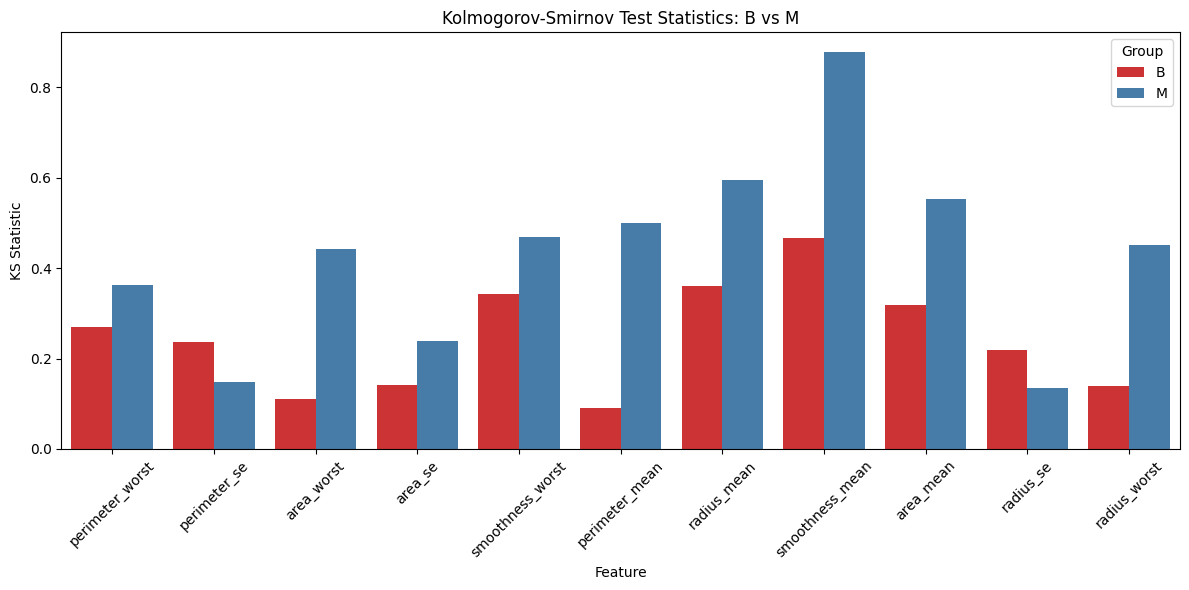

In [ ]:
# Combine results for side-by-side comparison
df_b["Group"] = "B"
df_m["Group"] = "M"

# Concatenate the DataFrames
df_combined = pd.concat([df_b, df_m])

# Visualization for KS Statistic
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.melt(df_combined, id_vars=["Feature", "Group"], value_vars=["KS Statistic"]),
            x="Feature", y="value", hue="Group", palette="Set1")
plt.title("Kolmogorov-Smirnov Test Statistics: B vs M")
plt.ylabel("KS Statistic")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.tight_layout()
plt.show()


In [ ]:
# Upload WBCD dataset
print("Upload the Wisconsin Breast Cancer Dataset (WBCD):")
wbcd_file = r"/content/wisconsin.csv"
wbcd_df = pd.read_csv(wbcd_file)

# Upload New FNAC Dataset
print("Upload the new FNAC-like dataset:")
fnac_file = r"/content/RIMS_FNAC.csv"
fnac_df = pd.read_csv(fnac_file)

Upload the Wisconsin Breast Cancer Dataset (WBCD):
Upload the new FNAC-like dataset:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Ensure common features between datasets
common_features = list(set(wbcd_df.columns).intersection(set(fnac_df.columns)))
features_for_ks_test = [feature for feature in common_features if feature != "Diagnosis"]

# Subset datasets to these features
wbcd_subset = wbcd_df[features_for_ks_test]
fnac_subset = fnac_df[features_for_ks_test]

# Define target labels for both datasets
y_wbcd = wbcd_df['Diagnosis']
y_fnac = fnac_df['Diagnosis']

# Standardize features
scaler = StandardScaler()
X_wbcd = scaler.fit_transform(wbcd_subset)
X_fnac = scaler.transform(fnac_subset)

# Split WBCD dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wbcd, y_wbcd, test_size=0.2, random_state=42)

# Define individual classifiers
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Probability required for ROC-AUC

# Create an ensemble using Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('svm', svm_model)
    ],
    voting='soft'  # 'soft' for probabilities, 'hard' for majority vote
)

# Train ensemble on WBCD training data
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble on WBCD test data
y_pred_wbcd = ensemble_model.predict(X_test)
print("\nPerformance on WBCD Test Data:")
print(classification_report(y_test, y_pred_wbcd))
print(f"ROC-AUC Score: {roc_auc_score(pd.get_dummies(y_test).iloc[:, 1], ensemble_model.predict_proba(X_test)[:, 1]):.2f}")

# Test ensemble on FNAC dataset
y_pred_fnac = ensemble_model.predict(X_fnac)
print("\nPerformance on FNAC Dataset:")
print(classification_report(y_fnac, y_pred_fnac))
print(f"ROC-AUC Score: {roc_auc_score(pd.get_dummies(y_fnac).iloc[:, 1], ensemble_model.predict_proba(X_fnac)[:, 1]):.2f}")



Performance on WBCD Test Data:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC-AUC Score: 1.00

Performance on FNAC Dataset:
              precision    recall  f1-score   support

           B       0.59      0.78      0.68       204
           M       0.77      0.58      0.66       258

    accuracy                           0.67       462
   macro avg       0.68      0.68      0.67       462
weighted avg       0.69      0.67      0.67       462

ROC-AUC Score: 0.77



Feature Importances (Sorted by Gradient Boosting):
             Feature  Random Forest  Gradient Boosting   Average
1       perimeter_se       0.018834           0.006468  0.012651
7    smoothness_mean       0.031022           0.008466  0.019744
9          radius_se       0.020667           0.021288  0.020978
3            area_se       0.057106           0.013794  0.035450
8          area_mean       0.074156           0.013625  0.043890
5     perimeter_mean       0.076335           0.013582  0.044958
6        radius_mean       0.081764           0.008492  0.045128
4   smoothness_worst       0.067357           0.115708  0.091533
2         area_worst       0.175409           0.012935  0.094172
0    perimeter_worst       0.204108           0.304997  0.254552
10      radius_worst       0.193243           0.480646  0.336944


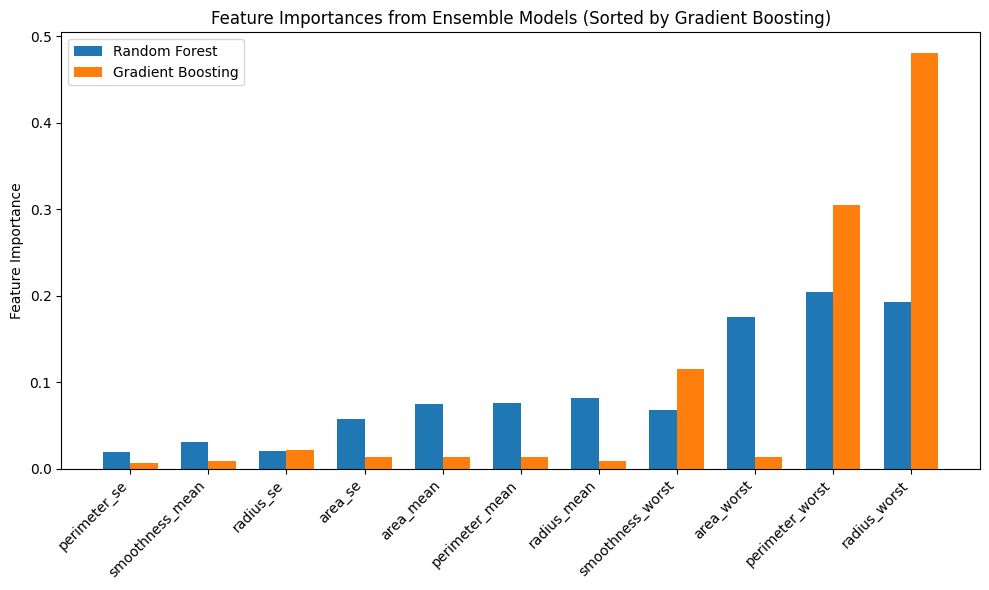

In [ ]:
# Fit individual models independently
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Extract feature importances
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Average feature importances if needed (optional)
average_importances = (rf_importances + gb_importances) / 2

#create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": features_for_ks_test,
    "Random Forest": rf_importances,
    "Gradient Boosting": gb_importances,
    "Average": average_importances
})

# Sort by Gradient Boosting importances in ascending order
feature_importance_df = feature_importance_df.sort_values(by="Average", ascending=True)

# Print the sorted feature importances
print("\nFeature Importances (Sorted by Gradient Boosting):")
print(feature_importance_df)

# Plot feature importances in ascending order based on Gradient Boosting
plt.figure(figsize=(10, 6))
x = np.arange(len(feature_importance_df))

# Bar plots for Random Forest and Gradient Boosting
width = 0.35
plt.bar(x - width / 2, feature_importance_df["Random Forest"], width, label="Random Forest")
plt.bar(x + width / 2, feature_importance_df["Gradient Boosting"], width, label="Gradient Boosting")

# Add labels and title
plt.xticks(x, feature_importance_df["Feature"], rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from Ensemble Models (Sorted by Gradient Boosting)")
plt.legend()
plt.tight_layout()
plt.show()



Feature Importances (Random Forest):
             Feature  Importance
0    perimeter_worst    0.204108
10      radius_worst    0.193243
2         area_worst    0.175409
6        radius_mean    0.081764
5     perimeter_mean    0.076335
8          area_mean    0.074156
4   smoothness_worst    0.067357
3            area_se    0.057106
7    smoothness_mean    0.031022
9          radius_se    0.020667
1       perimeter_se    0.018834
Evaluating top 10 features...
Evaluating top 9 features...
Evaluating top 8 features...
Evaluating top 7 features...
Evaluating top 6 features...
Evaluating top 5 features...
Evaluating top 4 features...
Evaluating top 3 features...
Evaluating top 2 features...
Evaluating top 1 features...


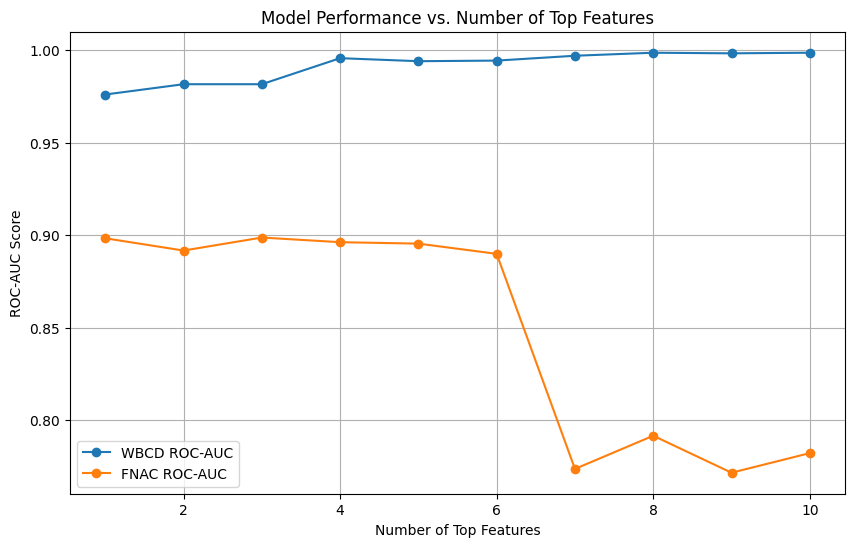


Model Performance vs. Number of Top Features:
   Features  WBCD ROC-AUC  FNAC ROC-AUC
0        10      0.998690      0.782148
1         9      0.998362      0.771546
2         8      0.998690      0.791553
3         7      0.997052      0.773598
4         6      0.994432      0.889915
5         5      0.994104      0.895444
6         4      0.995742      0.896223
7         3      0.981657      0.898731
8         2      0.981657      0.891701
9         1      0.976089      0.898332


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Create feature importance DataFrame from Random Forest model
feature_importances = pd.DataFrame({
    "Feature": features_for_ks_test,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)


# Rank features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
ranked_features = feature_importances["Feature"].tolist()

# Target labels
y_wbcd = wbcd_df['Diagnosis']
y_fnac = fnac_df['Diagnosis']

# Standardize features
scaler = StandardScaler()
wbcd_scaled = scaler.fit_transform(wbcd_df[ranked_features])
fnac_scaled = scaler.transform(fnac_df[ranked_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(wbcd_scaled, y_wbcd, test_size=0.2, random_state=42)

# Define classifiers
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model)],
    voting='soft'
)

# Function to evaluate performance
def evaluate_subset(features_subset):
    X_train_subset = X_train[:, features_subset]
    X_test_subset = X_test[:, features_subset]
    X_fnac_subset = fnac_scaled[:, features_subset]

    # Train ensemble
    ensemble_model.fit(X_train_subset, y_train)

    # Evaluate on WBCD test data
    y_pred_wbcd = ensemble_model.predict(X_test_subset)
    roc_auc_wbcd = roc_auc_score(y_test, ensemble_model.predict_proba(X_test_subset)[:, 1])

    # Evaluate on FNAC data
    y_pred_fnac = ensemble_model.predict(X_fnac_subset)
    roc_auc_fnac = roc_auc_score(y_fnac, ensemble_model.predict_proba(X_fnac_subset)[:, 1])

    return {
        "WBCD ROC-AUC": roc_auc_wbcd,
        "FNAC ROC-AUC": roc_auc_fnac
    }

# Test combinations of features
results = []
for n_features in range(10, 0, -1):  # Top 10 to top 1 features
    print(f"Evaluating top {n_features} features...")
    subset_indices = list(range(n_features))
    performance = evaluate_subset(subset_indices)
    results.append({
        "Features": n_features,
        **performance
    })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df["Features"], results_df["WBCD ROC-AUC"], label="WBCD ROC-AUC", marker='o')
plt.plot(results_df["Features"], results_df["FNAC ROC-AUC"], label="FNAC ROC-AUC", marker='o')
plt.xlabel("Number of Top Features")
plt.ylabel("ROC-AUC Score")
plt.title("Model Performance vs. Number of Top Features")
plt.legend()
plt.grid()
plt.show()


print("\nModel Performance vs. Number of Top Features:")
print(results_df)